<a href="https://colab.research.google.com/github/1500-Shubham/ML_With_Python_GoogleColab/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Dataset Feature
  - brand, year, price, present price, kms driven, fuel type, seller type, transmission type, owners

### Work Flow
  - Car Data
  - Pre Processing : Missing values, standarization
    - Label Encoding: String to Numbers
    - car_df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
    - Columns unique value against numerical value
  - Split data
  - 2 Model Algo : Linear & Lasso Regression Model
  - Accuracy Score - Classification Problem
    - CANT USE Accuracy Score -> Y is continuos data -> Accuracy Score used in classification problem
    - training_data_accuracy= accuracy_score(training_predict_values,y_train)
  - Continuos data -> R2 Score
      - from sklearn import metrics
      - error_score = metrics.r2_score(y_train,training_predict_values)
      - depends on magnitute of values error_score
      - cant give generalized value
      - for accuracy score -

### Importing Dependencies

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

from sklearn import metrics
from sklearn.metrics import accuracy_score

### Data Collection Preprocessing
- car_df.info()
- describe, shape

In [4]:
car_df = pd.read_csv("/content/car data.csv")
car_df.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [3]:
car_df.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [5]:
car_df.shape

(301, 9)

In [6]:
car_df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [11]:
# DATA Distribution
print(car_df['Fuel_Type'].value_counts())
print(car_df['Seller_Type'].value_counts())
print(car_df['Transmission'].value_counts())


Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


### Data Label Encoding
- Text To Numerical Machine learning to understand

In [12]:
# encoding Fuel_Type Column
car_df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

<ipython-input-12-1906325971>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)


In [13]:
# encoding Seller_Type Column
car_df.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

<ipython-input-13-3644148193>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_df.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)


In [14]:
# encoding Transmission Column
car_df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

<ipython-input-14-214376746>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)


In [25]:
car_df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


### Splitting data

In [31]:
x= car_df.drop(columns=['Car_Name','Selling_Price'],axis=1)
y= car_df['Selling_Price']
# print(y.value_counts())

#### Pandas To Numpy for model training

In [34]:
x= np.asarray(x)
y= np.asarray(y)
print(x[0])

[2.014e+03 5.590e+00 2.700e+04 0.000e+00 0.000e+00 0.000e+00 0.000e+00]


In [36]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)
print(x_train)

[[2.0170e+03 9.4000e+00 1.5141e+04 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [2.0140e+03 3.4500e+00 1.6500e+04 ... 1.0000e+00 0.0000e+00 1.0000e+00]
 [2.0170e+03 3.6000e+00 2.1350e+03 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 ...
 [2.0130e+03 1.8610e+01 5.6001e+04 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [2.0160e+03 1.0790e+01 4.3000e+04 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [2.0130e+03 7.3000e-01 1.2000e+04 ... 1.0000e+00 0.0000e+00 0.0000e+00]]


### Model Training


1.   Linear Regression -> Directly proportional mein use
  - lin_reg_model= LinearRegression()
  - predict, fit
2.   Lasso -> Lasso() use



In [39]:
lin_reg_model= LinearRegression()

In [40]:
lin_reg_model.fit(x_train,y_train)

LinearRegression()

#### Prediction model

In [ ]:
training_predict_values= lin_reg_model.predict(x_train)
print(training_predict_values)
# CANT USE Accuracy Score -> Y is continuos data -> Accuracy Score used in classification problem
# training_data_accuracy= accuracy_score(training_predict_values,y_train)
# print(training_data_accuracy)

#### Accuracy for Continuos Data
- R squared Error

In [49]:
error_score = metrics.r2_score(y_train,training_predict_values)
print(error_score)

0.8838169193709796


#### Visualize the actual prices and predicted prices

Text(0.5, 1.0, 'Actual Prices vs Predicted Prices')

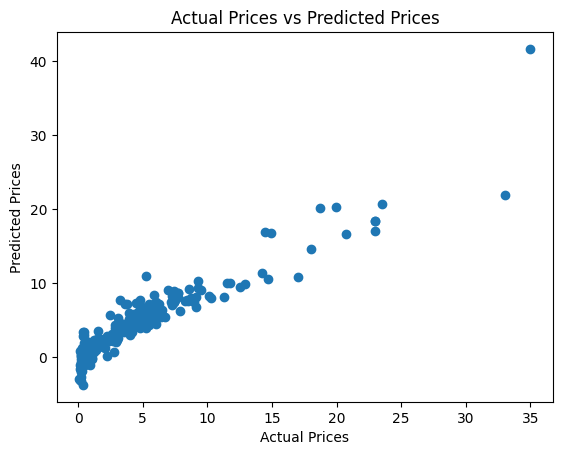

In [50]:
plt.scatter(y_train,training_predict_values)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")

0.8401532365377697


Text(0.5, 1.0, 'Actual Prices vs Predicted Prices')

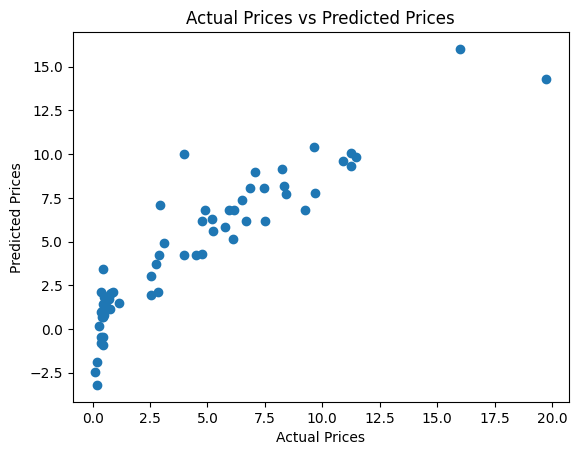

In [52]:
# Test Data Prediction
testing_predict_values= lin_reg_model.predict(x_test)
error_score = metrics.r2_score(y_test,testing_predict_values)
print(error_score)

plt.scatter(y_test,testing_predict_values)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")

### Lasso Regression

[ 6.78487861e+00  1.03052148e+00  4.33053370e+00  2.19376150e-02
  3.57946207e+00  2.79503372e+00  1.43719894e+00  4.14889545e-01
  1.61166418e+00  1.12839641e+00  4.32086309e+00  6.17477452e+00
  9.29097627e-01  7.35592155e-01  6.15378778e+00  3.42694561e+00
  2.32984882e+00  7.50014006e+00  4.61811711e+00  4.43437311e+00
  4.45915634e+00  2.73352428e+00  4.44377264e+00  1.71378422e+00
  2.49318608e-01  3.94331375e+00  1.37445456e+00  4.61754769e+00
  1.38595068e+00  7.35605367e+00  7.24473016e+00  6.54331682e+00
  2.29055849e+00  2.19058216e+01  2.19873970e+00  5.64492151e+00
  2.82714047e+00  7.68311323e+00  5.67039850e+00  1.00273475e+01
  1.99828812e+00  2.37716894e+00  1.22731322e+00  2.40303328e+00
  9.94390646e+00  2.01662591e+00 -6.42391420e-01  5.42943934e+00
  1.14107420e+01 -5.10458803e-03  1.09479248e+00  1.61329534e+00
  5.38687939e+00  1.36601921e+00  7.71862076e+00  1.84430864e+01
  2.49779943e+00  1.56000342e-01  1.81959532e+00  9.31246211e+00
  3.96558814e+00  7.02797

Text(0.5, 1.0, 'Actual Prices vs Predicted Prices')

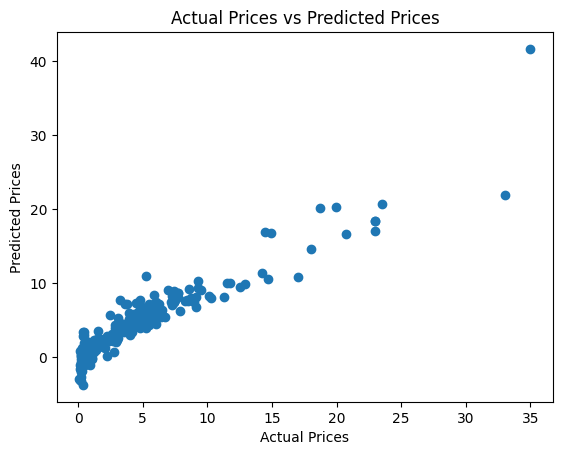

In [53]:
lasso_reg_model= LinearRegression()
lasso_reg_model.fit(x_train,y_train)
training_predict_values= lin_reg_model.predict(x_train)
print(training_predict_values)
error_score = metrics.r2_score(y_train,training_predict_values)
print(error_score)
plt.scatter(y_train,training_predict_values)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")